# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [0]:
import keras

from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

In [0]:
(x_train, y_train),(x_test, y_test ) = keras.datasets.cifar10.load_data()

In [0]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [0]:
# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [0]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    
    model = Sequential()
    model.add(Dense(units = input_shape[1] ,input_dim = input_shape[1], kernel_initializer = 'normal', activation = 'relu',name = 'input'))
    
    for i, n_units in enumerate(num_neurons):
        model.add(Dense(units=n_units, kernel_initializer='normal', activation='relu',name="hidden_layer"+str(i+1)))  
           
                
    model.add(Dense(units=output_units,kernel_initializer='normal', activation='softmax',name='output'))

    return(model)


In [0]:
## 超參數設定

LEARNING_RATE = [0.01,0.001,0.0001]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.9

def build_opt(opt,lr):
    if opt == 'SGD' :
        return optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    elif opt == 'RMSprop': 
        return  optimizers.RMSprop(lr=lr, rho=0.9, epsilon=None, decay=0.0)
    elif opt == 'AdaGrad':
        return  optimizers.Adagrad(lr=lr, epsilon=None, decay=0.0)
    elif opt == 'Adam':
        return optimizers.Adam(lr=lr, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [14]:
results = {}
Opts= ['SGD','RMSprop','AdaGrad','Adam']

for lr in LEARNING_RATE:
    for opt in Opts:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print(f'Current opt= {opt}, lr= {lr}\n')
        
        model = build_mlp(input_shape=x_train.shape)
        model.summary()
        optimizer = build_opt(opt,lr)
    
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer )

        model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
        
        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]
    
        exp_name_tag = "ex- %s" % str(opt)+str('+')+str(lr)
    
        results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Current opt= SGD, lr= 0.01

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 3072)              9440256   
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 11,179,146
Trainable params: 11,179,146
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

In [15]:
results.keys()

dict_keys(['ex- SGD+0.01', 'ex- RMSprop+0.01', 'ex- AdaGrad+0.01', 'ex- Adam+0.01', 'ex- SGD+0.001', 'ex- RMSprop+0.001', 'ex- AdaGrad+0.001', 'ex- Adam+0.001', 'ex- SGD+0.0001', 'ex- RMSprop+0.0001', 'ex- AdaGrad+0.0001', 'ex- Adam+0.0001'])

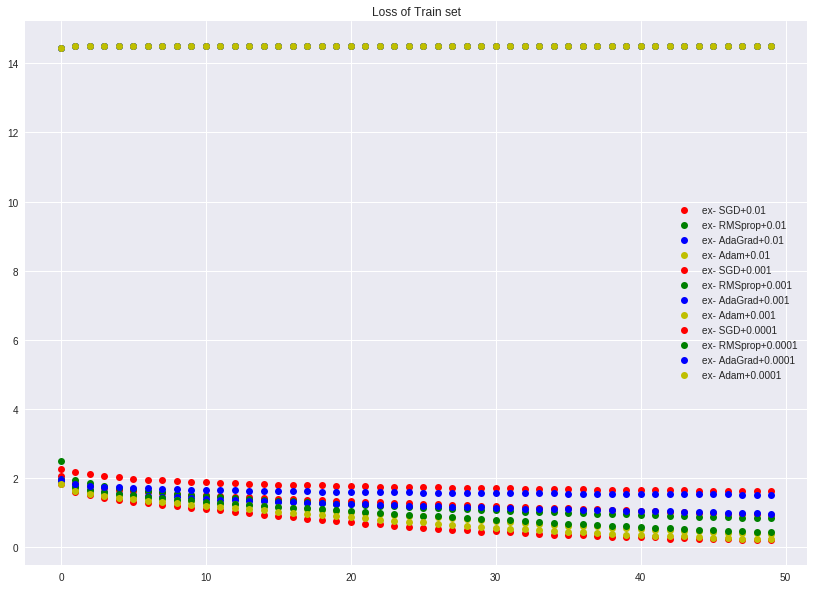

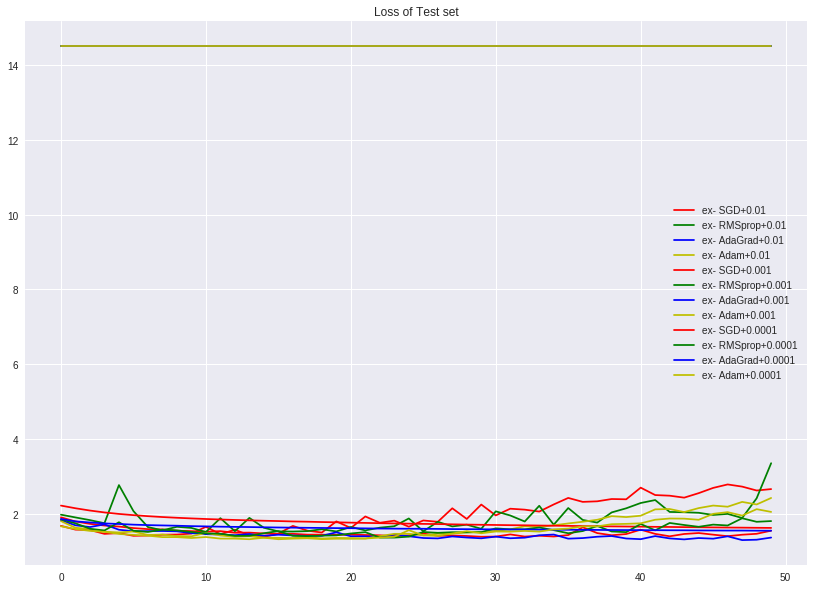

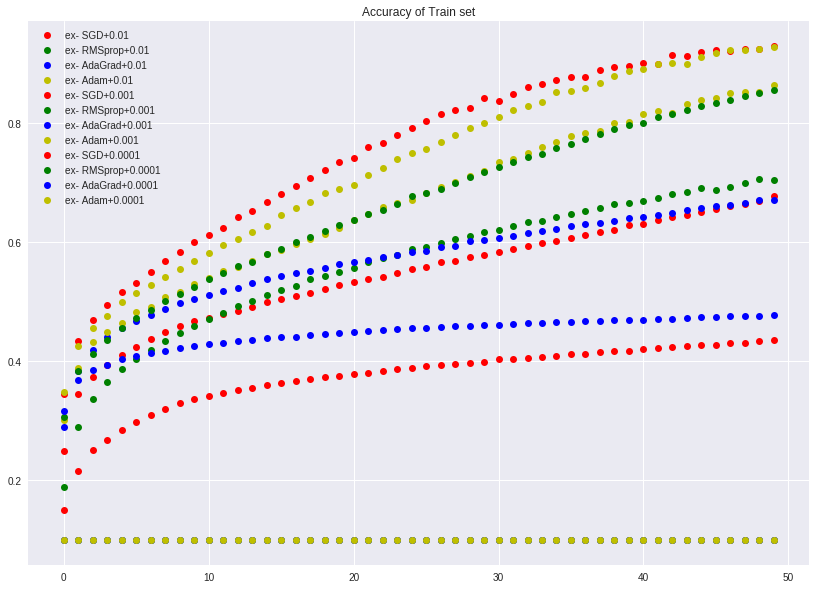

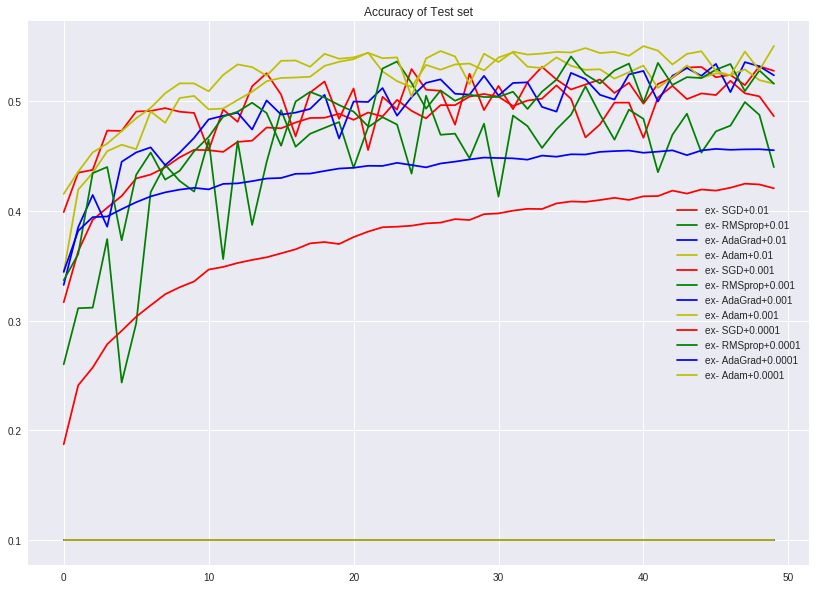

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline


color_bar = ["r", "g", "b", "y"]

plt.figure(figsize=(14,10))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], 'o', label=cond, color=color_bar[i%4])
    
plt.title("Loss of Train set")
plt.legend()
plt.show()

plt.figure(figsize=(14,10))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '-', label=cond, color=color_bar[i%4])
plt.title("Loss of Test set")
plt.legend()
plt.show()

plt.figure(figsize=(14,10))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], 'o', label=cond, color=color_bar[i%4])

plt.title("Accuracy of Train set")   
plt.legend()
plt.show()

plt.figure(figsize=(14,10))
for i, cond in enumerate(results.keys()):
     plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '-', label=cond, color=color_bar[i%4])
plt.title("Accuracy of Test set")
plt.legend()